# Deliverables (1) & (2) - EDA and Data Preparation

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [71]:
df_bank = pd.read_csv('bank-full.csv')

In [72]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [73]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### We have customers with average yearly balance negative and number of days from last contact (pdays) that are negative. These fields require further review.

In [74]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [75]:
df_bank.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

### We have seven numeric types and 10 object types. We need to change the object types to categorical variables. However, we do not have any null values.

In [76]:
for x in df_bank.columns:
    if df_bank[x].dtype.name == "object":
        df_bank[x] = df_bank[x].astype("category")

In [77]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [78]:
### check for incorrect imputation 
realno = lambda x:np.isreal(x)
df_bank.apply(realno).count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [79]:
### check for negative values 
neg_n = lambda x:x<0
for (col,coldata) in df_bank.items():
    if (df_bank[col].dtype.name == 'int64'):
       if(df_bank[col].apply(neg_n).any()):
           print(col)

balance
pdays


In [80]:
### Average Balances over a period could geneuinly be negative if accounts are allowed to be overdrawn. However, number of days from last contact(pdays) cannot be negative. We have negatives as pdays and many of them as seen below
df_bank[df_bank['pdays']  < 0 ]['pdays'].count()

36954

In [81]:
 pdays_mean = df_bank[df_bank['pdays'] >= 0]['pdays'].mean()
 pdays_mean

224.57769165556496

In [82]:
df_bank['pdays'] = df_bank['pdays'].replace(-1,pdays_mean)
df_bank[df_bank['pdays']  < 0 ]['pdays'].count()

0

In [83]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,49.290444,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,224.577692,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,224.577692,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,224.577692,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [84]:
for x in df_bank.columns:
    if df_bank[x].dtype.name == "category":
        print(df_bank[x].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [85]:
### mapping of categorical variable (target) to numeric 
mapping =  {'no':0,'yes':1}
df_bank['Target'] = df_bank['Target'].replace(mapping)
df_bank['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [86]:
### mapping of categorical variable (job) to numeric 
mapping =  {'unknown':0,'blue-collar':1,'management':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11}
df_bank['job'] = df_bank['job'].replace(mapping)
df_bank['job'].value_counts()

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [87]:
### mapping of categorical variable (marital) to numeric 
mapping =  {'married':0,'single':1,'divorced':2}
df_bank['marital'] = df_bank['marital'].replace(mapping)
df_bank['marital'].value_counts()

0    27214
1    12790
2     5207
Name: marital, dtype: int64

In [88]:
### mapping of categorical variable (education) to numeric 
mapping =  {'unknown':0,'secondary':1,'tertiary':2,'primary':3}
df_bank['education'] = df_bank['education'].replace(mapping)
df_bank['education'].value_counts()

1    23202
2    13301
3     6851
0     1857
Name: education, dtype: int64

In [89]:
### mapping of categorical variable (default) to numeric 
mapping =  {'no':0,'yes':1}
df_bank['default'] = df_bank['default'].replace(mapping)
df_bank['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [90]:
### mapping of categorical variable (housing) to numeric 
mapping =  {'no':0,'yes':1}
df_bank['housing'] = df_bank['housing'].replace(mapping)
df_bank['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [91]:
### mapping of categorical variable (loan) to numeric 
mapping =  {'no':0,'yes':1}
df_bank['loan'] = df_bank['loan'].replace(mapping)
df_bank['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [92]:
### mapping of categorical variable (contact) to numeric 
mapping =  {'unknown':0,'cellular':1,'telephone':2}
df_bank['contact'] = df_bank['contact'].replace(mapping)
df_bank['contact'].value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [93]:
### mapping of categorical variable (month) to numeric 
mapping =  {'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
df_bank['month'] = df_bank['month'].replace(mapping)
df_bank['month'].value_counts()

4     13766
6      6895
7      6247
5      5341
10     3970
3      2932
1      2649
0      1403
9       738
8       579
2       477
11      214
Name: month, dtype: int64

In [94]:
### mapping of categorical variable (poutcome) to numeric 
mapping =  {'unknown':0,'success':1,'failure':2,'other':3}
df_bank['poutcome'] = df_bank['poutcome'].replace(mapping)
df_bank['poutcome'].value_counts()

0    36959
2     4901
3     1840
1     1511
Name: poutcome, dtype: int64

In [95]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,0,2,0,2143,1,0,0,5,4,261,1,224.577692,0,0,0
1,44,3,1,1,0,29,1,0,0,5,4,151,1,224.577692,0,0,0
2,33,8,0,1,0,2,1,1,0,5,4,76,1,224.577692,0,0,0
3,47,1,0,0,0,1506,1,0,0,5,4,92,1,224.577692,0,0,0
4,33,0,1,0,0,1,0,0,0,5,4,198,1,224.577692,0,0,0


In [96]:
df_bank.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,0.061056,-0.126351,0.112785,-0.017879,0.097783,-0.185513,-0.015655,0.092577,-0.009120,0.092903,-0.004648,0.004760,-0.049594,0.001288,-0.012349,0.025155
job,0.061056,1.000000,0.058242,-0.063182,-0.000897,0.016976,-0.152714,-0.024524,0.075624,-0.007045,0.013143,0.006871,-0.031288,-0.051760,0.000841,0.001811,0.060468
marital,-0.126351,0.058242,1.000000,-0.053153,0.018404,-0.028172,-0.011671,-0.018526,-0.014290,-0.005217,-0.044321,0.018834,-0.029294,0.012342,0.006876,0.018829,0.043846
education,0.112785,-0.063182,-0.053153,1.000000,-0.006963,0.031418,-0.035337,-0.025033,0.021778,-0.005209,0.026937,-0.002620,0.014624,-0.009707,0.000111,-0.015100,-0.001359
default,-0.017879,-0.000897,0.018404,-0.006963,1.000000,-0.066745,-0.006025,0.077234,-0.024095,0.009424,0.014989,-0.010021,0.016822,0.008979,-0.018329,-0.034993,-0.022419
balance,0.097783,0.016976,-0.028172,0.031418,-0.066745,1.000000,-0.068768,-0.084350,0.047701,0.004503,0.094605,0.021560,-0.014578,-0.046444,0.016674,0.022465,0.052838
housing,-0.185513,-0.152714,-0.011671,-0.035337,-0.006025,-0.068768,1.000000,0.041323,-0.207722,-0.027982,-0.173887,0.005075,-0.023599,0.139708,0.037076,0.088209,-0.139173
loan,-0.015655,-0.024524,-0.018526,-0.025033,0.077234,-0.084350,0.041323,1.000000,0.000058,0.011370,0.021638,-0.012412,0.009980,0.008967,-0.011043,-0.019685,-0.068185
contact,0.092577,0.075624,-0.014290,0.021778,-0.024095,0.047701,-0.207722,0.000058,1.000000,0.038643,0.167103,0.001494,0.020046,-0.015506,0.139518,0.238209,0.130590
day,-0.009120,-0.007045,-0.005217,-0.005209,0.009424,0.004503,-0.027982,0.011370,0.038643,1.000000,0.101989,-0.030206,0.162490,-0.036635,-0.051710,-0.081224,-0.028348


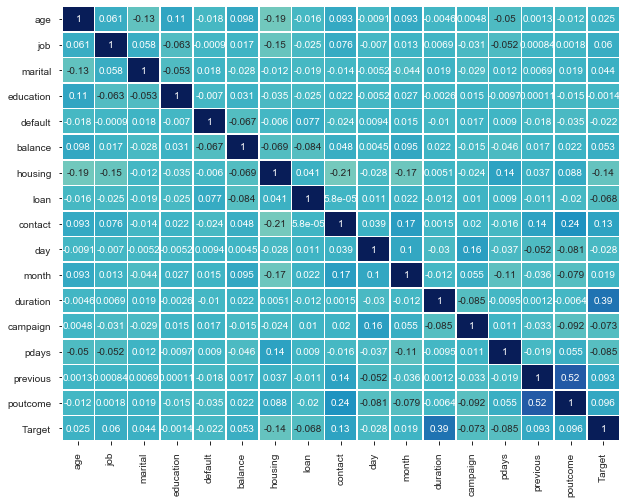

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df_bank.corr(),annot=True,linewidths=0.7,center=0,cbar=False,cmap="YlGnBu")

In [98]:
from pandas_profiling import ProfileReport
rep = ProfileReport(df_bank)
rep

In [99]:
### The column 'previous' is highly skewed and with many zeros, however this is possible as it represents the number of contact before this campaign, which is possible to be 0 as many customers may not have been contacted before the campaign

df_bank['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [100]:
### many customers also have zero balances in their account. This is also possible.
df_bank['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [101]:
### The number of zeros in month is not an issue as it is mapped to January as a month
df_bank['month'].value_counts()

4     13766
6      6895
7      6247
5      5341
10     3970
3      2932
1      2649
0      1403
9       738
8       579
2       477
11      214
Name: month, dtype: int64

In [102]:
###There is a strong correlation between the duration column and the target column. However, as advised in the problem statement. The duration column will not allow us to get a realistic prediction. So we need to drop it.

df_bank.drop('duration',inplace=True,axis=1)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,2,0,2,0,2143,1,0,0,5,4,1,224.577692,0,0,0
1,44,3,1,1,0,29,1,0,0,5,4,1,224.577692,0,0,0
2,33,8,0,1,0,2,1,1,0,5,4,1,224.577692,0,0,0
3,47,1,0,0,0,1506,1,0,0,5,4,1,224.577692,0,0,0
4,33,0,1,0,0,1,0,0,0,5,4,1,224.577692,0,0,0


In [103]:
### Data Transformation
from sklearn  import preprocessing
min_max_scaler =  preprocessing.MinMaxScaler()
scaled_balance = min_max_scaler.fit_transform(df_bank[['balance']].values.astype('float'))
scaled_pdays = min_max_scaler.fit_transform(df_bank[['pdays']].values.astype('float'))
df_bank['balance'] = scaled_balance
df_bank['pdays'] = scaled_pdays

#df_scaled_balance = pd.DataFrame(scaled_balance)
#df_scaled_balance 

In [104]:
scaled_age = min_max_scaler.fit_transform(df_bank[['age']].values.astype('float'))
df_bank['age'] = scaled_age

In [105]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,2,0,2,0,0.092259,1,0,0,5,4,1,0.256986,0,0,0
1,0.337662,3,1,1,0,0.073067,1,0,0,5,4,1,0.256986,0,0,0
2,0.194805,8,0,1,0,0.072822,1,1,0,5,4,1,0.256986,0,0,0
3,0.376623,1,0,0,0,0.086476,1,0,0,5,4,1,0.256986,0,0,0
4,0.194805,0,1,0,0,0.072812,0,0,0,5,4,1,0.256986,0,0,0


In [106]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
ind_var = df_bank.columns[:-1]
dep_var = df_bank.columns[15]
X = df_bank[ind_var]
y = df_bank[dep_var]
#splitting of the data to dependent and independent variables 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 10,stratify=df_bank['Target'])

# Deliverable 3 - Ensemble Model

In [113]:
### using standard logistic regression model 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#fit model
lg_rg = LogisticRegression()
lg_rg.fit(X_train,y_train)

#prediction 
y_predict = lg_rg.predict(X_test)

#print coef and intercept
lg_rg_para = pd.DataFrame(lg_rg.coef_)
lg_rg_para['Intercept'] = lg_rg.intercept_
print(lg_rg_para)


0         1         2         3         4         5         6  \
0 -0.24104  0.024619  0.179728 -0.008023 -0.420323  1.984137 -0.733868   

          7         8         9        10        11       12        13  \
0 -0.558589  0.633405 -0.007952 -0.011657 -0.145837 -2.31004  0.061773   

         14  Intercept  
0  0.123327  -1.405407  


In [114]:
#print model score
lg_rg_score = lg_rg.score(X_test,y_test)
print(lg_rg_score)

0.882114420524919


[[    5  1582]
 [   17 11960]]


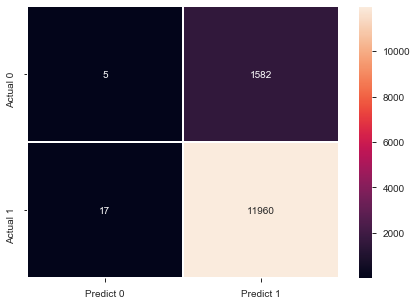

In [115]:
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')


In [116]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]

print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 11960
False Positives (FP) = 1582
False Negatives (FN)= 17
True Negatives (TN) = 5


In [117]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

Accuracy = 0.882114420524919
Recall/TPR/Sensitivity = 0.9985806128412791
Precision = 0.8831782602274405
Error Rate = 0.1178855794750811
Specificity/TNR =  0.00315059861373661
FPR = 0.9968494013862634
ROC_AUC Score = 0.5008656057275078
F1 = 0.9373408048904738


The model accuracy is about 88% and recall is high(almost 100%). This is not bad as our aim in this case is to minimize false negatives as those will be lost opportunities for the bank but false positives will not be an issue as such target will simply ignore the message from the bank. However, using other model may improve our accuracy without significant change to recall.

In [118]:
### using a single decision tree 
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=10)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [119]:
print(dTree.score(X_train, y_train))
dTree_score = dTree.score(X_test, y_test)
print(dTree_score)

1.0
0.8267472721910941


The score on the training dataset is 1.0 which clearly shows the model overfits the data

In [129]:
###Reduce overfitting by setting depth to 4, using other depth resulted into lower accuracy from the test data
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=10)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
dTreeR_score = dTreeR.score(X_test, y_test)
print(dTreeR_score)

0.8935128132208424
0.893394278973754


In [130]:
###Get the gini importance of the features 
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

Imp
age        0.104924
job        0.000000
marital    0.003150
education  0.000000
default    0.000000
balance    0.000000
housing    0.032995
loan       0.007395
contact    0.080060
day        0.005215
month      0.014019
campaign   0.000000
pdays      0.405715
previous   0.000000
poutcome   0.346525


pdays is the most important feature

In [131]:
### The picture of the tree also shows the split start from pdays
from sklearn import tree
train_char_label = ['No', 'Yes']
Deposit_Tree_File = open('dep_tree.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Deposit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Deposit_Tree_File.close()

[[  305  1282]
 [  164 11813]]


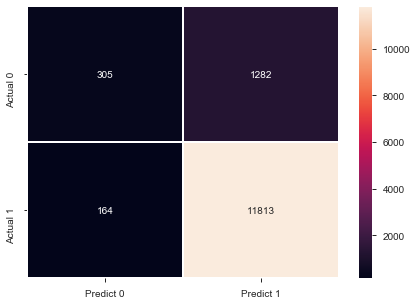

In [132]:
y_predict = dTreeR.predict(X_test)

con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')


In [133]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]

print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 11813
False Positives (FP) = 1282
False Negatives (FN)= 164
True Negatives (TN) = 305


In [134]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

Accuracy = 0.893394278973754
Recall/TPR/Sensitivity = 0.9863070885864573
Precision = 0.9021000381825124
Error Rate = 0.10660572102624595
Specificity/TNR =  0.19218651543793322
FPR = 0.8078134845620668
ROC_AUC Score = 0.5892468020121953
F1 = 0.9423261008296107


We gain more accuracy eventhough recall slighly reduces

In [135]:
### using BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bcl =  BaggingClassifier(base_estimator=dTree,n_estimators=10,random_state=1)
bcl.fit(X_train,y_train)
bcl_score = bcl.score(X_test,y_test)
print(bcl_score)

0.8858743733411973


[[  344  1243]
 [  305 11672]]


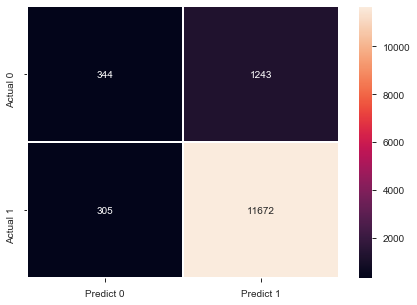

In [136]:
y_predict = bcl.predict(X_test)

con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')


In [137]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]
print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 11672
False Positives (FP) = 1243
False Negatives (FN)= 305
True Negatives (TN) = 344


In [138]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)


Accuracy = 0.8858743733411973
Recall/TPR/Sensitivity = 0.9745345245053019
Precision = 0.9037553232675184
Error Rate = 0.11412562665880271
Specificity/TNR =  0.21676118462507876
FPR = 0.7832388153749212
ROC_AUC Score = 0.5956478545651903
F1 = 0.9378113450104452


Both accuracy and recall lower than that of the regularised decision tree

In [139]:
### using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abcl =  AdaBoostClassifier(base_estimator=dTreeR,n_estimators=10,random_state=1)
abcl.fit(X_train,y_train)
abcl_score = abcl.score(X_test,y_test)
print(abcl_score)

0.892214685933353


[[  374  1213]
 [  249 11728]]


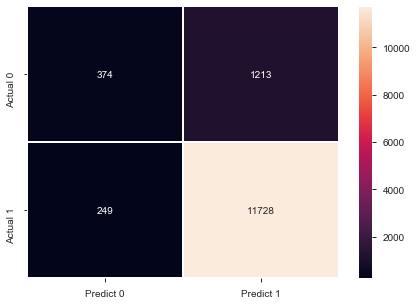

In [140]:
y_predict = abcl.predict(X_test)
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')

In [141]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]
print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 11728
False Positives (FP) = 1213
False Negatives (FN)= 249
True Negatives (TN) = 374


In [142]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

Accuracy = 0.892214685933353
Recall/TPR/Sensitivity = 0.979210152792853
Precision = 0.9062669036395951
Error Rate = 0.107785314066647
Specificity/TNR =  0.23566477630749844
FPR = 0.7643352236925016
ROC_AUC Score = 0.6074374645501757
F1 = 0.941327554378361


More accurate and higher recall than the previous algorithm 

In [143]:
### using GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl =  GradientBoostingClassifier(n_estimators=10,random_state=1)
gbcl.fit(X_train,y_train)
gbcl_score = gbcl.score(X_test,y_test)
print(gbcl_score)

0.8873488646416986


[[   89  1498]
 [   30 11947]]


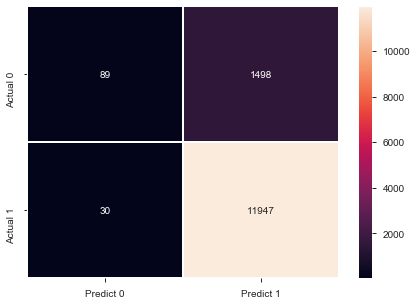

In [144]:
y_predict = gbcl.predict(X_test)
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')

In [145]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]
print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 11947
False Positives (FP) = 1498
False Negatives (FN)= 30
True Negatives (TN) = 89


In [146]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

Accuracy = 0.8873488646416986
Recall/TPR/Sensitivity = 0.9974951991316691
Precision = 0.8885831164001488
Error Rate = 0.11265113535830139
Specificity/TNR =  0.056080655324511654
FPR = 0.9439193446754883
ROC_AUC Score = 0.5267879272280904
F1 = 0.9398945794980725


Accuracy dropped but recall is higher

In [147]:
### using RandomForrest
from sklearn.ensemble import RandomForestClassifier
rfcl =  RandomForestClassifier(n_estimators=100,random_state=1,max_features=10)
rfcl.fit(X_train,y_train)
rfcl_score = rfcl.score(X_test,y_test)
print(rfcl_score)

0.8934680035387791


[[  410  1177]
 [  268 11709]]


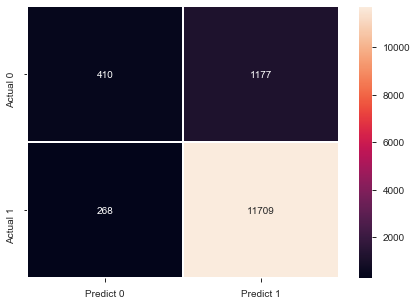

In [148]:
y_predict = rfcl.predict(X_test)
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')

In [149]:


TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]
print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)


The confusion matrix...
True Positives (TP) = 11709
False Positives (FP) = 1177
False Negatives (FN)= 268
True Negatives (TN) = 410


In [66]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)





Accuracy = 0.8934680035387791
Recall/TPR/Sensitivity = 0.9776237789095766
Precision = 0.9086605618500698
Error Rate = 0.10653199646122088
Specificity/TNR =  0.258349086326402
FPR = 0.741650913673598
ROC_AUC Score = 0.6179864326179894
F1 = 0.9418815106785182


In [150]:
### Printing all scores to determine the best
print('Logistic Regression = ', lg_rg_score)
print('Complex Tree = ',dTree_score)
print('Simple Tree = ',dTreeR_score)
print('Bagging Classifier = ', bcl_score)
print('AdaBoosting = ',abcl_score)
print('GradientBoosting = ',gbcl_score)
print('RandomForrest = ', rfcl_score)


Logistic Regression =  0.882114420524919
Complex Tree =  0.8267472721910941
Simple Tree =  0.893394278973754
Bagging Classifier =  0.8858743733411973
AdaBoosting =  0.892214685933353
GradientBoosting =  0.8873488646416986
RandomForrest =  0.8934680035387791


RandomForrestClassifier is the best model so far in terms of accuracy. Though recall is slightly lower than some of the other algorithms.

# Deliverable 4 - Selected Model and parameters

In [162]:
### combining the best models using votingclassifier
from sklearn.ensemble import VotingClassifier
vtcl = VotingClassifier(estimators=[('lg_rg',lg_rg),('dTreeR',dTreeR),('abcl',abcl),('rfcl',rfcl)],voting='hard')
vtcl.fit(X_train,y_train)
vtcl.score(X_test,y_test)

0.8931731052786789

[[  212  1375]
 [   74 11903]]


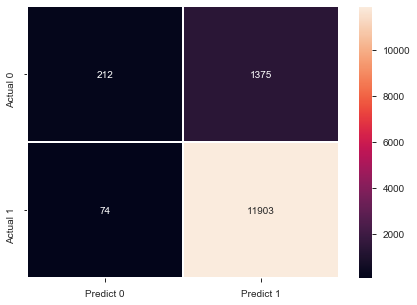

In [163]:
y_predict = vtcl.predict(X_test)
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')

In [164]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]
print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)


The confusion matrix...
True Positives (TP) = 11903
False Positives (FP) = 1375
False Negatives (FN)= 74
True Negatives (TN) = 212


In [160]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)


Accuracy = 0.8931731052786789
Recall/TPR/Sensitivity = 0.9938214911914502
Precision = 0.8964452477782798
Error Rate = 0.10682689472132115
Specificity/TNR =  0.13358538122243227
FPR = 0.8664146187775678
ROC_AUC Score = 0.5637034362069413
F1 = 0.9426252227281726


Using the voting classifier with the best of the models we got earlier gave the best combination of accuracy and recall